In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model

In [3]:
# Load the Spotify dataset JSON
with open("data_10_spotify.json", "r") as fp:
    spotify_data = json.load(fp)

In [4]:
# Load the GTZAN model
gtzan_model = load_model("GTZAN_CNN_model.h5")

In [5]:
# Prepare the Spotify dataset features and labels
spotify_features = np.array(spotify_data["mfcc"])
spotify_labels = np.array(spotify_data["labels"])


In [6]:
# Get predictions for the Spotify dataset using the GTZAN model
gtzan_preds_on_spotify = gtzan_model.predict(spotify_features)

# Convert the predictions to class labels
gtzan_preds_on_spotify = np.argmax(gtzan_preds_on_spotify, axis=1)

# Calculate the accuracy of the GTZAN model on the Spotify dataset
gtzan_accuracy_on_spotify = np.mean(gtzan_preds_on_spotify == spotify_labels)

print(f"Accuracy of GTZAN model on Spotify dataset: {gtzan_accuracy_on_spotify}")

141/141 [==============================] - 1s 8ms/step
Accuracy of GTZAN model on Spotify dataset: 0.41755555555555557


In [7]:
# Create a confusion matrix and classification report
cm = confusion_matrix(spotify_labels, gtzan_preds_on_spotify)
report = classification_report(spotify_labels, gtzan_preds_on_spotify, target_names=spotify_data["mapping"])

print("Classification report for GTZAN model on Spotify dataset:")
print(report)

Classification report for GTZAN model on Spotify dataset:
              precision    recall  f1-score   support

       blues       0.34      0.05      0.09       450
   classical       0.95      0.98      0.97       450
     country       0.20      0.17      0.19       450
       disco       0.53      0.70      0.60       450
      hiphop       0.39      0.66      0.49       450
        jazz       0.80      0.15      0.25       450
       metal       0.50      0.40      0.44       450
         pop       0.24      0.63      0.35       450
      reggae       0.44      0.30      0.35       450
        rock       0.20      0.14      0.16       450

    accuracy                           0.42      4500
   macro avg       0.46      0.42      0.39      4500
weighted avg       0.46      0.42      0.39      4500



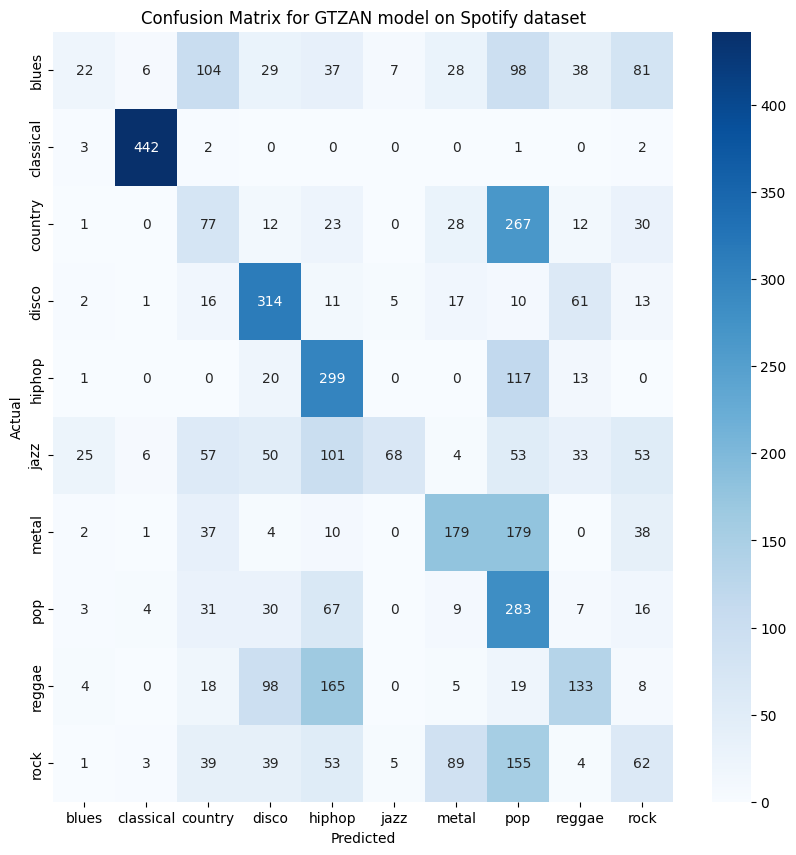

In [8]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=spotify_data["mapping"], yticklabels=spotify_data["mapping"], cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GTZAN model on Spotify dataset")
plt.show()